
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
income = pd.read_csv(r"C:\Users\Wang Tong\chss_2024_assignment\最終課題\Data\income_district.csv")
income.head()

,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


In [9]:
labor = pd.read_csv(r"C:\Users\Wang Tong\chss_2024_assignment\最終課題\Data\h27_labor_df.csv")
labor.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
1,23101,10.0,2,愛知県,名古屋市千種区,青柳町,NaN,262,86,197,175
2,23101,1005.0,3,愛知県,名古屋市千種区,青柳町,５丁目,33,12,24,26
3,23101,1006.0,3,愛知県,名古屋市千種区,青柳町,６丁目,113,27,82,64
4,23101,1007.0,3,愛知県,名古屋市千種区,青柳町,７丁目,116,47,91,85


In [10]:
job=pd.read_csv(r"C:\Users\Wang Tong\chss_2024_assignment\最終課題\Data\h27_job_df.csv")
job.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_administrative_male,B_professional_workers_male,C_office_workers_male,...,C_office_workers_female,D_sales_workers_female,E_service_workers_female,F_safety_workers_female,G_agriculture_workers_female,H_production_workers_female,I_transport_workers_female,J_construction_workers_female,K_cleaning_workers_female,L_other_wokers_female
0,13101,NaN,1,東京都,千代田区,NaN,NaN,1391,3359,2438,...,3291,1127,1023,65,1,235,8,16,192,1823
1,13101,10.0,2,東京都,千代田区,丸の内,NaN,X,X,X,...,X,X,X,X,X,X,X,X,X,X
2,13101,1001.0,3,東京都,千代田区,丸の内,１丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
3,13101,1002.0,3,東京都,千代田区,丸の内,２丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
4,13101,1003.0,3,東京都,千代田区,丸の内,３丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [15]:
age = pd.read_csv(r"C:\Users\Wang Tong\chss_2024_assignment\最終課題\Data\h27_age_df.csv")
age.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-


C:\Users\Wang Tong\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Wang Tong\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Wang Tong\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Wang Tong\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Wang Tong\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarnin

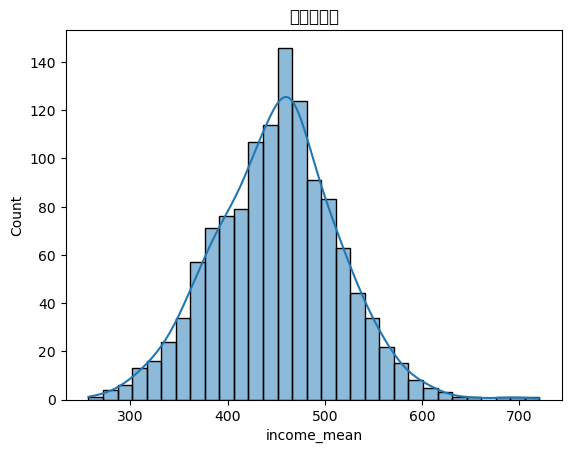

In [14]:
#收入分布を確認
sns.histplot(data = income,x='income_mean',kde=True,multiple='stack')
plt.title('収入の分布')
plt.show()

In [19]:
display(len(income), len(labor), len(job)
)
labor11= labor[labor["district2_id"].isna()]
labor11
labor1= labor11.drop(columns=["district2_id","level_identifier","state_name","city_name","district_name","district2_name"])
labor1.head()

1245

251258

251258

,district_id,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,45761,15806,33891,32964
429,23102,21403,6637,17626,14209
542,23103,44853,17606,34961,33698
945,23104,43786,14240,32761,27786
1172,23105,38918,14117,29065,24806


In [20]:
merged1 = pd.merge(income, labor1, how='outer',  left_on='area_code', right_on='district_id')
merged1.head()

,area_code,income_mean,district_id,labor_male,no_labor_male,labor_female,no_labor_female
0,1101.0,449.979373,1101.0,57113,20794,50951,48126
1,1102.0,395.847532,1102.0,71331,32827,57985,62446
2,1103.0,404.742547,1103.0,67234,28412,53846,55796
3,1104.0,385.278248,1104.0,54404,19733,45165,40631
4,1105.0,397.451303,1105.0,54823,22001,47069,46166


In [24]:
from sklearn.impute import SimpleImputer
merged1.replace('-', np.nan, inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scatterd_labor_male =  scaler.fit_transform(merged1[["labor_male"]])
scatterd_labor_female =  scaler.fit_transform(merged1[["labor_female"]])
scatterd_income =  scaler.fit_transform(merged1[["income_mean"]])
display(scatterd_labor_male,scatterd_labor_female,scatterd_income)
imputer = SimpleImputer(strategy='median')
merged1[["labor_male","no_labor_male","labor_female","no_labor_female","income_mean"]] = imputer.fit_transform(merged1[["labor_male","no_labor_male","labor_female","no_labor_female","income_mean"]])
merged2 = np.column_stack((scatterd_labor_male, scatterd_labor_female, scatterd_income))
merged2

array([[0.28260149],
       [0.35296359],
       [0.33268834],
       ...,
       [0.00207355],
       [0.00645324],
       [0.00461229]])

array([[0.30864527],
       [0.35125672],
       [0.32618296],
       ...,
       [0.0014539 ],
       [0.00643352],
       [0.00247163]])

array([[0.41623812],
       [0.29952462],
       [0.31870314],
       ...,
       [0.42433769],
       [0.42433769],
       [0.42433769]])

array([[0.28260149, 0.30864527, 0.41623812],
       [0.35296359, 0.35125672, 0.29952462],
       [0.33268834, 0.32618296, 0.31870314],
       ...,
       [0.00207355, 0.0014539 , 0.42433769],
       [0.00645324, 0.00643352, 0.42433769],
       [0.00461229, 0.00247163, 0.42433769]])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

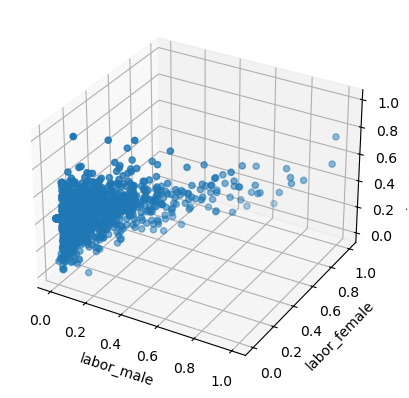

In [26]:

X = merged2[:, :2]  
y = merged2[:, 2]   

len(X) == len(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labor_male = merged2[:,0]
labor_female = merged2[:,1]
income_mean =  merged2[:,2]

ax.scatter(labor_male,labor_female, income_mean)


ax.set_xlabel("labor_male")
ax.set_ylabel("labor_female")
ax.set_zlabel("income_mean")


plt.show()

In [29]:
model = LinearRegression()
# モデルの訓練
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Predictions:", y_pred)

Mean Squared Error: 0.011170562765858944
Predictions: [0.36061124 0.40525814 0.47876803 0.45709459 0.40389383 0.43496015
 0.40494479 0.414462   0.41094705 0.4059945  0.40285048 0.43075984
 0.40946428 0.40489611 0.40358174 0.40292069 0.43542229 0.41863426
 0.4192918  0.4097841  0.47056898 0.41103506 0.42415871 0.46693292
 0.40806381 0.44508952 0.40309875 0.40791616 0.42752924 0.42389118
 0.45447881 0.4036758  0.41179137 0.39981044 0.44730171 0.57404859
 0.40970377 0.42254722 0.46692042 0.40664676 0.40442163 0.40143807
 0.51901621 0.40988932 0.37624663 0.43550585 0.41297207 0.39862757
 0.40360985 0.42790667 0.46566616 0.42728246 0.40949943 0.44449562
 0.44555572 0.42529292 0.41015421 0.42291602 0.4112755  0.55259536
 0.39785003 0.45732802 0.40658123 0.37755759 0.40724657 0.40768069
 0.41520553 0.40841167 0.43224083 0.48536793 0.40416056 0.33600548
 0.43607941 0.40572159 0.41632885 0.39686226 0.49676164 0.45252366
 0.41812598 0.40306418 0.40501295 0.42655763 0.42940771 0.38152432
 0.40282